# Домашнее задание №1


Задание присылать на почту **aleksartmonov@gmail.com** в форматах *.ipynb* и отрендеренный результат в *.html*

В теме письма указать ***AU2018 HW1 <Фамилия Имя>***

soft deadline: 23.02.2018T23:59:00+0300

hard deadline: 02.03.2018T23:59:00+0300

## Теоретический блок

##### Задача 1 (3 балла)

Когда Вы заходите в темную комнату из светлого помещения, то проходит некоторое время, прежде чем Вы станете видеть достаточно хорошо, чтобы различить очертания предметов. Какая из обсуждавшихся на лекции особенностей зрительного восприятия человека объясняет это явление? Какой процесс происходит в зрительной системе?

В темном помещении активируются палочки, которые различают очертания предметов, а колбочки при этом становятся менее активны. В зрительной системе происходит яркостная адаптация: диапазон яркостей, который глаз может воспринимать, меняется, подстраиваясь к текущему окружению.

##### Задача 2 (3 балла)

Рассмотрим некоторое цветовое пространство $R_{new}G_{new}B_{new}$, получающееся из исходного RGB по правилу:

$$
R_{new} = a_{11}R+a_{12}G+a_{13}B+a_{14}\\
G_{new} = a_{21}R+a_{22}G+a_{23}B+a_{24}\\
B_{new} = a_{31}R+a_{32}G+a_{33}B+a_{34}
$$

где R, G и B – вещественные числа от 0 до 1. 

Какими свойствами должны обладать коэффициенты $a_{ij}$, чтобы можно было без потерь информации переходить из одного пространства в другое и обратно?
(*) Какими свойствами должны обладать коэффициенты $a_{ij}$ , чтобы вещественные числа $R_{new},G_{new}$ и $B_{new}$ тоже лежали внутри куба со стороной 1?

* Матрица $a_{ij}$ должна быть обратимой (определитель не равен нулю).
* Сумма коэффициентов в каждой строчке должна быть равна единице.

## Практический блок

In [2]:
import cv2
import matplotlib.pylab as plt
%matplotlib inline

import numpy as np

##### Задача 3 (3 балла)

Загрузите изображение *lena.jpg* в переменную **lena**. Отобразите результат на экран.

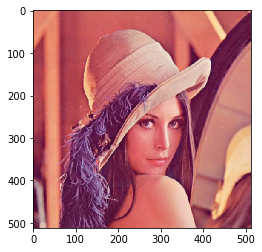

In [3]:
lena = cv2.imread('lena.jpg')[:,:,::-1]
n = lena.shape[0]
plt.imshow(lena)

##### Задача 4 (3 балла)

Поменяйте местами левую верхнюю и правую нижнюю четвертинки изображения **lena** и отобразите результат на экран.

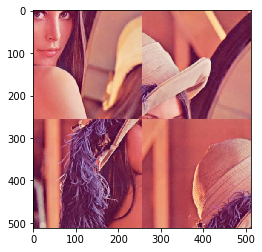

In [4]:
half = int(n / 2)
lena[:half, :half], lena[half:, half:] = lena[half:, half:].copy(), lena[:half, :half].copy()
plt.imshow(lena)

In [5]:
#back
lena[:half, :half], lena[half:, half:] = lena[half:, half:].copy(), lena[:half, :half].copy()

##### Задача 5 (3 балла)

Усредните значения всех трех цветовых каналов **lena** в каждый из каналов итогового изображения **lena_gray_my**.

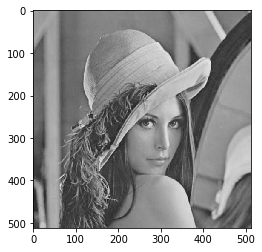

In [6]:
lena_gray_my = np.zeros_like(lena)
for i in range(3):
    lena_gray_my[:,:,i] = lena.mean(axis=2)
plt.imshow(lena_gray_my[:,:,::-1])

##### Задача 6 (3 балла)

Переведите исходное цветное изображение **lena** в изображение в градациях серого с помощью функции cvtColor. (**lena_gray_cvt**). Вычислите модуль разности между изображениями **lena_gray_my** и **lena_gray_cvt** и отобразите ее на экране.

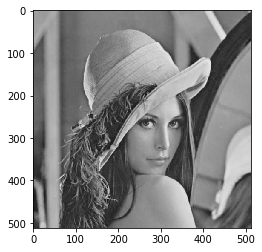

In [7]:
lena_gray_cvt = cv2.cvtColor(lena, cv2.COLOR_RGB2GRAY)
lena_gray_cvt = cv2.cvtColor(lena_gray_cvt, cv2.COLOR_GRAY2RGB)
plt.imshow(lena_gray_cvt)

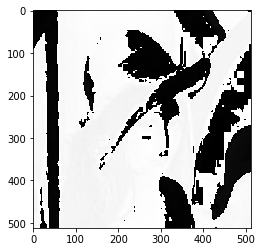

In [8]:
plt.imshow(np.abs(lena_gray_cvt - lena_gray_my))

##### Задача 7 (3 балла)

Переведите исходное изображение **lena** из RGB в HSV. Установите значения S и V в максимум для всех пикселей изображения. Полученное изображение переведите обратно в RGB. Отобразите результат.

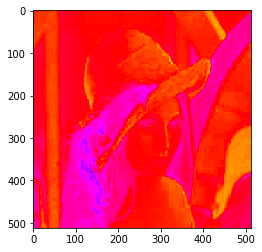

In [9]:
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_RGB2HSV)
lena_hsv[:,:,1:] = 255
lena_hsv = cv2.cvtColor(lena_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(lena_hsv)

##### Задача 8 (3 балла)
Переведите изображение **lena** в одно из цветовых пространств (cvtColor) с выделенной координатой яркости (HSV, HSL, HSB, CIE Lab), инвертируйте яркостную составляющую, переведите обратно в RGB. Отобразите результат.

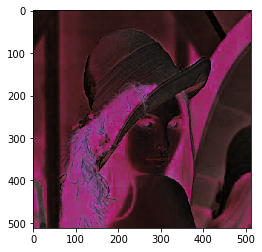

In [10]:
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_RGB2HSV)
lena_hsv[:,:,-1] = 255 - lena_hsv[:,:,-1]
lena_hsv = cv2.cvtColor(lena_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(lena_hsv)

##### Задача 9 (3 балла)

По цветному изображению **lena** на входе сгенерируйте 6 цветных изображений, полученных путем перестановки значений цветовых каналов r, g и b. исходного изображения. Соберите коллаж $3x2$ и отобразите его на экране. 

In [ ]:
from itertools import permutations

collage = np.zeros((n * 3, n * 2, 3), dtype=lena.dtype)

for k, prm in enumerate(permutations(range(3))):
    x, y = k // 2, k % 2
    collage[n * x : n * (x + 1), n * y : n * (y + 1)] = lena[:, :, prm]
    
plt.imshow(collage)

##### Задача 10 (3 балла)
Переведите изображение **lena** из RGB в CIE Lab при помощи встроенной функции OpenCV. Загрузите исходное иображение еще раз и переведите из RGB в CIE Lab самостоятельно с помощью формул (google it). Сравните полученные изображения, построив разницу между ними. (Должен получится ~0)

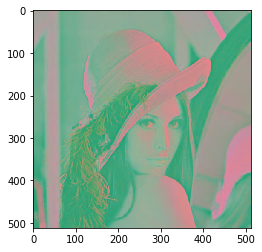

In [12]:
lena_lab = cv2.cvtColor(lena, cv2.COLOR_RGB2LAB)
plt.imshow(lena_lab)

In [11]:
M = np.array([
    [0.412453, 0.357580, 0.180423],
    [0.212671, 0.715160, 0.072169],
    [0.019334, 0.119193, 0.950227]
])

lena_xyz = np.array([[np.matmul(M, lena[i, j]) for j in range(n)] for i in range(n)])

In [13]:
lena_xyz[:,:,0] /= 0.950456
lena_xyz[:,:,2] /= 1.088754

In [14]:
cst1 = 0.008856
cst2 = 128

f = lambda t: t**(1/3) if t > cst1 else 7.787 * t + 16 / 116

In [15]:
lena_lab_my = np.zeros_like(lena_lab)

lena_lab_my[:,:,0] = [[116 * lena_xyz[i, j, 1]**(1/3) - 16 if lena_xyz[i, j, 1] > cst1 else 903.3 * lena_xyz[i, j, 1]
                       for j in range(n)] for i in range(n)]

lena_lab_my[:,:,1] = [[500 * (f(lena_xyz[i, j, 0]) - f(lena_xyz[i, j, 1])) + cst2 for j in range(n)]
                      for i in range(n)]

lena_lab_my[:,:,2] = [[200 * (f(lena_xyz[i, j, 1]) - f(lena_xyz[i, j, 2])) + cst2 for j in range(n)]
                      for i in range(n)]

In [16]:
lena_lab_my[:,:,0] = (lena_lab_my[:,:,0] * 255/100).astype(lena_lab_my.dtype)
lena_lab_my[:,:,1:] += 128

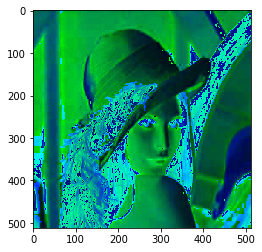

In [17]:
plt.imshow(lena_lab_my)

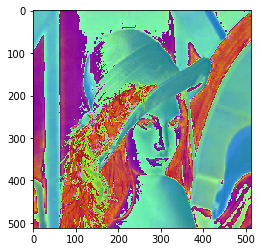

In [18]:
diff = lena_lab_my - lena_lab
plt.imshow(diff)

In [19]:
diff.mean()

135.87180709838867